In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
#from random import randrange
#import random
from scipy.spatial.distance import cdist
%matplotlib inline

In [2]:
from sklearn.datasets import make_blobs
# Create Data
data, labels = make_blobs(n_samples=200, n_features=2, 
                           centers=3, cluster_std=2.0, random_state=100)
x = data[:,0]
y = data[:,1]

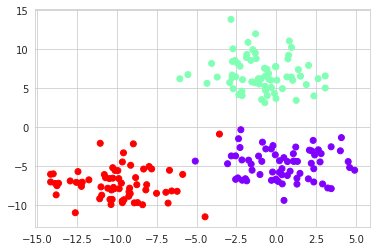

In [3]:
sns.set_style("whitegrid")
plt.scatter(x , y, c = labels, cmap='rainbow')

In [4]:
import numpy as np
#from scipy.spatial.distance import cdist

def Initilize_centroids(x_inp, n_centroids, seed):
    '''
    Initilize centroids by randomly selecting from data range.
    
    -----------
    
    Input:   x_inp - numpy ndarray of dimension (n_samples, n_features)
             n_centroind  - number of components, means or centroids.
             seed - random seed, integer value
    Output:  init_means - numpy ndarray of dimension (n_centroids, n_features)
    '''
    #set rand.seed
    np.random.seed(seed)
    x_max, x_min  = x_inp.max(axis=0), x_inp.min(axis=0)
    n_features = x_inp.shape[1]
    init_means = np.random.rand(n_centroids, n_features) * (x_max - x_min) + x_min
    return init_means
    
   
    

def UpdateLabels(x_inp, means, n_centroids):
    '''
    Calculates distances between the all data poins and centroids,
    then assignes label to each data point based on proximity to
    centroid position.
    -----------
    
    Input:   x_inp - numpy ndarray of dimension (n_samples, n_features)
             means - centroid positions, numpy ndarray of dimension (n_centroids, n_features)   
             n_centroind  - number of components( means or centroids )
    Output:  dist  - numpy ndarray of dimension (n_samples, n_centroids)
             labels - numpy ndarray of dimension(n_samples)   
    '''
    
    #do it via scipy
    dist = cdist(x_inp, means, 'euclidean')
    
    #or do it ur way
    #for i in range(len(means)):
    #    dist = x_inp - means[i]
    #    dist = dist*dist ??????????????
    
    #assign labels
    labels = dist.argmin(axis=1) # very elegant way of labeling!

    
    return dist, labels


In [5]:
def UpdateMeans(x_inp, labels, n_centroids):
    """
    Updates centroid positions based on new labels.
    -------------------
    
    Input:   x_inp - numpy ndarray of dimension (n_samples, n_features)
  
    Output:  labels - numpy ndarray of dimension(n_samples)   
    
    """
    centers = []
    for i in range(n_centroids):
        centers.append(x_inp[labels == i].mean(axis=0))
        
    centers = np.array(centers)
    
    return centers

    

In [6]:
def TrainKmeans(x_inp, n_centroids, n_iters, seed):
    '''
      
  
    -----------
    
    Input:   x_inp - numpy ndarray of dimension (n_samples, n_features)
             n_centroind  - number of components( means or centroids )
    Output:  means  - numpy ndarray of dimension (n_centroids, n_features)
             labels - clustering labels based on finale expectation value comparison  
    '''
    
    
    means = Initilize_centroids(x_inp, n_centroids, seed)   
    save_change =  []
    
    for i in range(n_iters):
       
        dist, new_labels = UpdateLabels(x_inp, means, n_centroids)
        new_means = UpdateMeans(x_inp, new_labels, n_centroids)
        #change = means - new_means
        means = new_means.copy()
        
        #save_change.append(np.dot(change, change))
    
    return means, new_labels#, save_change



In [7]:
means, pred_labels = TrainKmeans(data, 3, 50, seed=50)

In [8]:
means, pred_labels

(array([[  0.43296409,  -4.75241138],
        [-10.04973314,  -7.35770466],
        [ -0.91585255,   6.83232012]]),
 array([1, 1, 1, 1, 2, 2, 0, 1, 0, 2, 0, 0, 2, 2, 0, 2, 0, 0, 1, 0, 2, 0,
        0, 1, 1, 2, 2, 0, 1, 0, 2, 1, 1, 2, 1, 0, 0, 2, 1, 1, 1, 0, 1, 0,
        1, 1, 1, 2, 0, 2, 0, 0, 0, 2, 2, 2, 0, 1, 2, 2, 0, 2, 0, 0, 0, 2,
        1, 1, 1, 0, 1, 2, 1, 1, 0, 1, 1, 1, 0, 1, 2, 0, 2, 2, 0, 0, 0, 1,
        2, 0, 0, 1, 1, 0, 2, 2, 1, 1, 0, 0, 2, 2, 2, 0, 0, 1, 2, 2, 0, 0,
        0, 1, 0, 2, 2, 2, 2, 1, 0, 1, 2, 0, 2, 0, 2, 2, 2, 0, 0, 0, 1, 0,
        2, 2, 0, 0, 2, 0, 0, 1, 2, 2, 1, 1, 2, 1, 2, 1, 2, 0, 1, 2, 0, 2,
        2, 1, 2, 1, 1, 1, 2, 1, 1, 2, 0, 0, 2, 1, 2, 1, 2, 0, 2, 0, 1, 2,
        2, 1, 1, 2, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 2, 0, 0, 0, 2, 1, 0, 2,
        2, 1]))

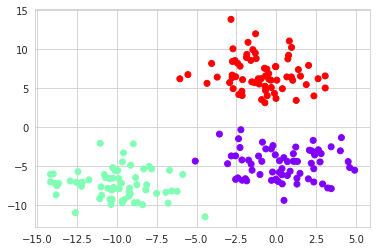

In [9]:
sns.set_style("whitegrid")
plt.scatter(x , y, c = pred_labels, cmap='rainbow')